#Análisis Factorial Exploratorio (AFE), Análisis Factorial Confirmatorio (AFC) y Fiabilidad:

## Librerías:
* En R debemos instalar los paquetes una vez cada vez que abramos el cuaderno de nuevo
* En R debemos llamar a los paquetes una vez cada vez que abramos el cuaderno de nuevo - y tras haberlos instalado.

In [ ]:
install.packages("caret") #Para llevar a cabo la división de la muestra en dos mitades mediante muestreo de las observciones
library(caret)
install.packages("psych") #Para realizar el AFE, el Análisis Paralelo y otras operaciones como el test de Mardia o el KMO
library(psych)
install.packages("polycor") #Para estimar la matriz policórica o tetracórica según el caso
library(polycor)
install.packages("ggcorrplot") #Para graficar las correlaciones obtenidas mediante un mapa de calor
library(ggcorrplot)
install.packages("GPArotation") #Para poder rotar los factores
library(GPArotation)
install.packages("lavaan") #Para realizar el AFC
library(lavaan)
install.packages("coefficientalpha") #Para estimar los índices alfa y omega
library(coefficientalpha)

## Datos:
Los datos que vamos a utilizar para ejemplificar cómo hacer un Análisis Factorial en R proceden de la evaluación PISA 2018 para España. Todos los datos de PISA 2018 se pueden descargar en el siguiente link en formato SPSS o SAS:
https://www.oecd.org/pisa/data/2018database/ 

Sin embargo, para facilitar la utilización de este script, se ha subido un archivo - en formato *.csv* - al GitHub del proyecto. Dicho archivo se encuentra en la pestaña *Datasets*, y contiene exclusivamente los datos con los que vamos a trabajar. Específicamente, estos datos proceden del *Cuestionario de contexto del alumno*, cuestionario que deben rellenar todos los alumnos que pasan PISA y que trata de medir la existencia de variables socioeconómicas, metacognitivas, motivacionales e, incluso, emocionales, que pueden tener impacto sobre el rendimiento académico. Entre las variables relacionadas con la motivación podemos encontrar:
* La afición por la lectura.
* La actitud hacia la Educación.
* La competitividad.
* La perseverancia.
* El miedo al fracaso.
* La autoeficacia.
* La orientación a metas de aproximación a la maestría.

Pero, para simplificar más las cosas y no trabajar con un número considerable de factores, nos vamos a centrar simplemente en tres: la competitividad, la perseverancia y el miedo al fracaso.

Los items (preguntas) que miden respectivamente la competitividad, al perseverancia y el miedo al fracaso de los estudiantes son:

**¿Hasta qué punto estás de acuerdo con las siguientes afirmaciones sobre ti mismo?**
* ST181Q02HA: Disfruto trabajando en situaciones que requieren competir con los demás.
* ST181Q03HA: Es importante para mí hacerlo mejor que los demás al realizar una tarea.
* ST181Q04HA: Me esfuerzo mucho cuando estoy compitiendo contra los demás.

**¿Hasta qué punto estás de acuerdo con las siguientes afirmaciones sobre ti mismo?**
* ST182Q03HA: Me siento satisfecho cuando me esfuerzo todo lo que puedo.
* ST182Q04HA: Cuando inicio una tarea continúo hasta terminarla.
* ST182Q05HA: Cuando hago algo, parte de mi satisfacción se debe a que he mejorado mis resultados anteriores.
* ST182Q06HA: Si algo no se me da bien, prefiero seguir esforzándome para mejorar, en lugar de hacer otra cosa que sí se me da bien.

**¿Hasta qué punto estás de acuerdo con las siguientes afirmaciones?**
* ST183Q01HA: Cuando me he equivocado, me preocupa lo que otras personas piesen de mí.
* ST183Q02HA: Cuando me he equivocado, me preocupa no tener el talento suficiente.
* ST183Q03HA: Cuando me he equivocado, dudo sobre mis planes para el futuro.

La escala de respuesta para estos tres conjuntos de ítems es la misma: 1 - *Totalmente en desacuerdo*, 2 - *En desacuerdo*, 3 - *De acuerdo* y 4 - *Totalmente de acuerdo*.




In [3]:
#Para subir un archivo de datos (por ejemplo, un .csv) a Google Colab y trabajar con R debemos hacer lo siguiente:
#Clicamos en el icono de la derecha de la pantalla que tiene forma de carpeta y se abre un desplegable a su derecha
#Clicamos en el icono que nos muestra una carpeta con una flecha hacia arriba en su interior
#Se abrirá una carpeta para que busquemos el archivo. Una vez seleccionado, le damos a "Abrir"
#Esperamos a que se cargue y, una vez cargado, ya podemos usar la función de R apropiada para leer dicho archivo
#(Esta operación hay de carga hay que realizarla cada vez que se abra el cuaderno)
datos <- read.csv("Datos_PISA_ESP.csv", sep=";", dec=",")
#Este csv esta separado por ; y los decimales son ,
dim(datos) #Tenemos 35943 observaciones y 37 columnas
head(datos)

[1] 35943    37

,CNTRYID,CNT,CNTSCHID,CNTSTUID,ST160Q01IA,ST160Q02IA,ST160Q03IA,ST160Q04IA,ST160Q05IA,JOYREAD,⋯,ST188Q01HA,ST188Q02HA,ST188Q03HA,ST188Q06HA,ST188Q07HA,RESILIENCE,ST208Q01HA,ST208Q02HA,ST208Q04HA,MASTGOAL
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,724,ESP,72400001,72400490,2,2,2,2,3,-0.1042,⋯,3,3,2,2,3,-0.8109,3,3,3,-0.4347
2,724,ESP,72400001,72401482,3,1,2,3,3,-0.8176,⋯,2,3,3,3,3,-0.4531,4,3,5,0.4317
3,724,ESP,72400001,72402362,3,1,1,2,3,-0.9016,⋯,3,3,3,2,2,-0.8738,5,5,5,1.8524
4,724,ESP,72400001,72402959,1,1,1,1,1,-0.1119,⋯,3,2,3,3,3,-0.4909,4,4,4,0.5761
5,724,ESP,72400001,72403316,1,3,2,1,1,0.9011,⋯,3,3,3,3,3,-0.0614,2,2,3,-1.0266
6,724,ESP,72400001,72403522,3,1,2,3,3,-0.8176,⋯,4,3,3,4,3,0.7512,4,4,4,0.5761


In [4]:
#Vamos a extraer simplemente las columnas de identificador del alumno y las de los items que nos interesan (los que miden la competitividad, la perseverancia y el miedo al fracaso):
subconjunto <- datos[,c("CNTSTUID", "ST181Q02HA", "ST181Q03HA", "ST181Q04HA", "ST182Q03HA", "ST182Q04HA", "ST182Q05HA", "ST182Q06HA", "ST183Q01HA", "ST183Q02HA", "ST183Q03HA")]
#Como vamos a hacer un doble Análisis Factorial - exploratorio y confirmatorio - vamos a dividir la muestra en aproximadamente el 50%
#Realizando el Exploratorio sobre una mitad, y el Confirmatorio sobre la otra, para ver si los resultados concuerdan
set.seed(2021) #Establecemos una semilla para facilitar la reproductibilidad de los resultados
subconjunto.ids <- createDataPartition(subconjunto$CNTSTUID, p=0.5, list=F)
#Obtenemos mediante muestreo aleatorio el 50% de las observaciones (identificadas mediante la columna de ID del alumno)
datos_AFE <- subconjunto[subconjunto.ids, ] #Para el Exploratorio solo conservamos las observaciones cuyos IDs han sido muestreados
dim(datos_AFE) #17972 observaciones
datos_AFC <- subconjunto[-subconjunto.ids, ] #Para el COnfirmatorio solo conservamos las observaciones cuyos IDs no han sido muestreados
dim(datos_AFC) #17971 observaciones
#Eliminamos la columna de IDs, ya que no nos hace falta:
datos_AFE$CNTSTUID <- NULL
datos_AFC$CNTSTUID <- NULL

[1] 17972    11

[1] 17971    11

## Análisis Factorial Exploratorio (AFE):

### Pruebas de normalidad de los datos:
(Paso previo antes de llevar a cabo un Análisis Factorial. Necesario para saber qué método de extracción de factores debemos emplear)

Call: mardia(x = datos_AFE, na.rm = TRUE)

Mardia tests of multivariate skew and kurtosis
Use describe(x) the to get univariate tests
n.obs = 16232   num.vars =  10 
b1p =  3.92   skew =  10595.01  with probability  <=  0
 small sample skew =  10597.33  with probability <=  0
b2p =  140.16   kurtosis =  82.89  with probability <=  0

Warning message in ks.test(datos_AFE, pnorm):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  datos_AFE
D = 0.88912, p-value < 2.2e-16
alternative hypothesis: two-sided


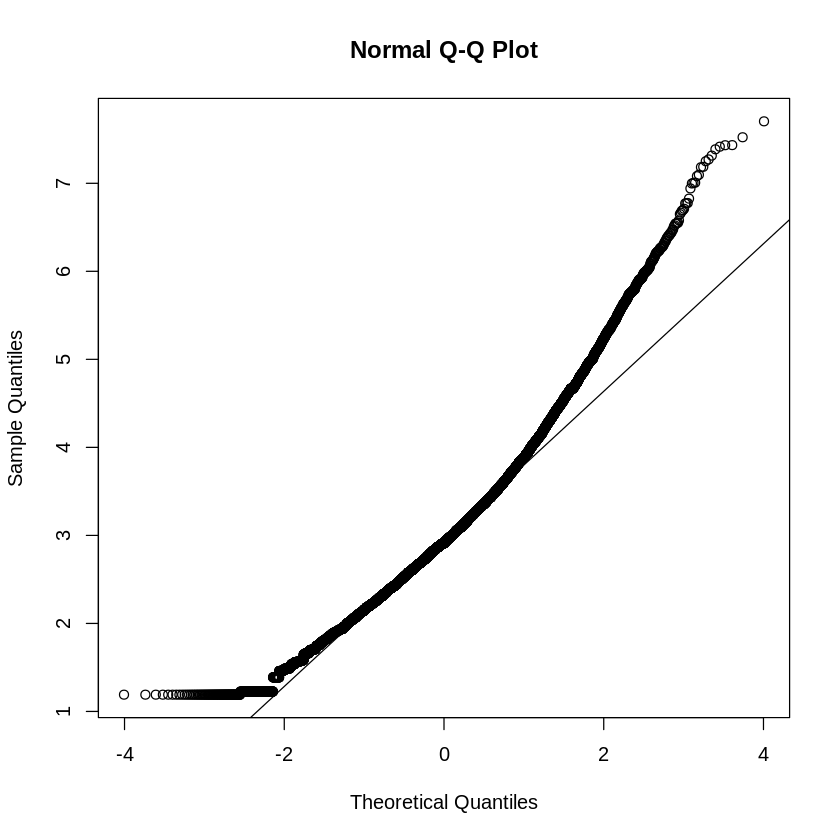

In [5]:
mardia(datos_AFE, na.rm = TRUE)
ks.test(datos_AFE, pnorm)
#Como los p-valores son inferiores a los niveles de significación habituales (10%, 5% y 1%) se rechaza la hipótesis nula, es decir, se rechaza la normalidad de los datos
#También podemos comprobar este hecho haciendo uso del Q-Q plot, ya que la línea de puntos está bastante alejada de la recta que es refleja la normal
#Como no existe normalidad, debemos emplear un método de extracción de factores robusto la inexistencia de la misma: ULS (Unweigthed Least Squares: Mínimos Cuadrados No Ponderados)

### Estimacion de la matriz policórica:
La matriz de correlaciones policórica es la más recomendada para llevar a cabo un Análisis Factorial, ya que la matriz de correlaciones de Pearson - más conocida - infraestima el grado de asociación entre las variables y, por ello, el peso de los factores obtenidos.

Si tuviéramos datos dicotómicos, la matriz a emplear sería la matriz tetracórica (similar a la policórica pero con datos dicotómicos).

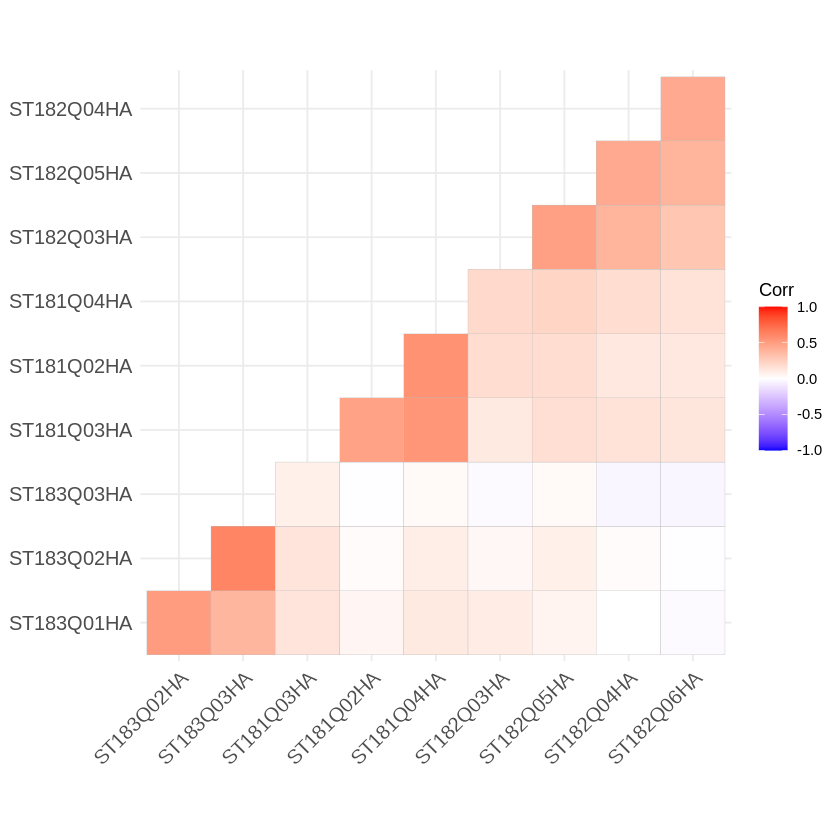

In [6]:
policorica <- hetcor(datos_AFE)$correlations
ggcorrplot(policorica,type="lower",hc.order = T)
#Vemos que las correlaciones son más altas entre los ítems que conforman cada uno de los subgrupos

### Verificamos que la matriz sea factorizable:
(Paso previo antes de llevar a cabo un AFE. Si la matriz no fuese factorizable, la relación entre las variables sería tan baja que no se formarían factores).

Vamos a usar tres pruebas diferentes para comprobar si la matriz es factorizable:
* Test de esfericidad de Bartlett: si rechazamos la hipótesis nula (la matriz de correlaciones es la matriz identidad), la matriz será afctorizable
* Medida KMO (Kaiser-Meyer-Olkin): valores superiores a 0,75 indican que la matriz es factorizable.
* Determinante de la matriz: valores cercanos a cero indican que la matriz es factorizable.

In [7]:
p_esf <- cortest.bartlett(policorica, n=17972)
p_esf$p.value
#El p-valor del test de esfericidad de Bartlett es de 0
KMO(policorica)
#El resultado del KMO es de 0,73
det(policorica)
#El determinante tiene un valor bajo: 0.0787972649422848
#En general, podemos decir que la matriz es adecuada para llevar a cabo un AFE

[1] 0

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = policorica)
Overall MSA =  0.73
MSA for each item = 
ST181Q02HA ST181Q03HA ST181Q04HA ST182Q03HA ST182Q04HA ST182Q05HA ST182Q06HA 
      0.74       0.76       0.72       0.76       0.77       0.77       0.79 
ST183Q01HA ST183Q02HA ST183Q03HA 
      0.74       0.62       0.65 

[1] 0.07879726

### Determinamos el número de factores a extraer:
Existen cuatro métodos principales:
* Regla de Kaiser: se deben aceptar todos aquellos factores con un autovalor mayor a 1.
* Gráfico de sedimentación (*scree plot*): gráfico donde podemos ver cómo disminuye la varianza explicada o el autovalor a medida que vamos aumentando el número de factores a extraer. 
* Establecimiento de un porcentaje de varianza explicada mínimo (por ejemplo, el 75%): cogeríamos todos los factores necesarios para explicar ese porcentaje mínimo de varianza.
* Análisis paralelo (método recomendado): el AP parte de generar nuevas muestras aleatorias (mínimo 100) con las mismas variables y observaciones que la muestra original y, a partir de ello, se queda con aquellos factores cuyo autovalor es superior a los generados por azar. 

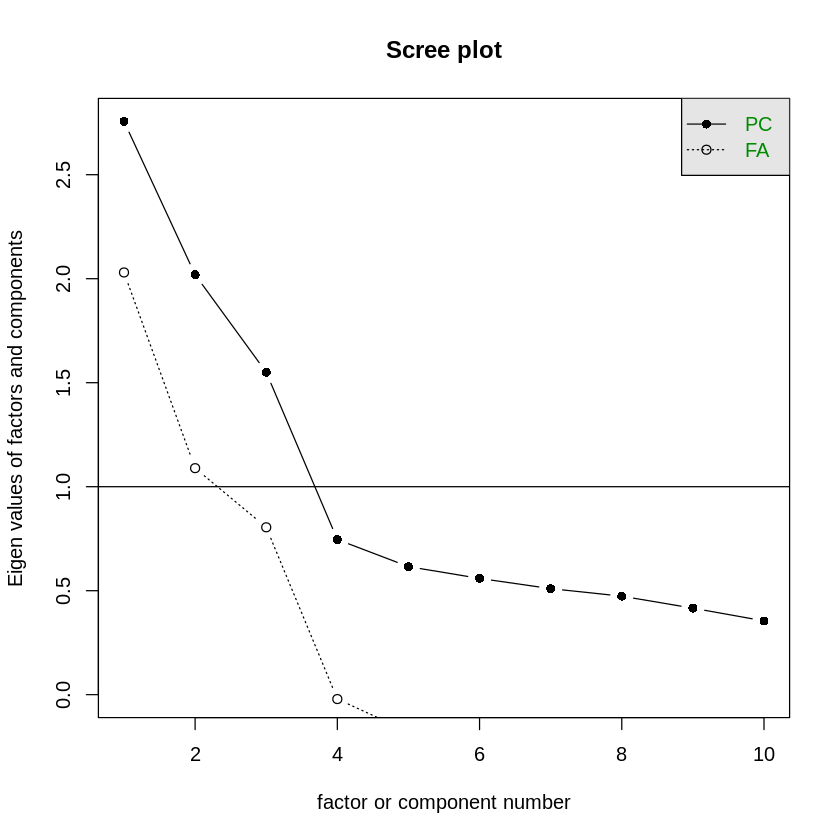

Parallel analysis suggests that the number of factors =  3  and the number of components =  NA 


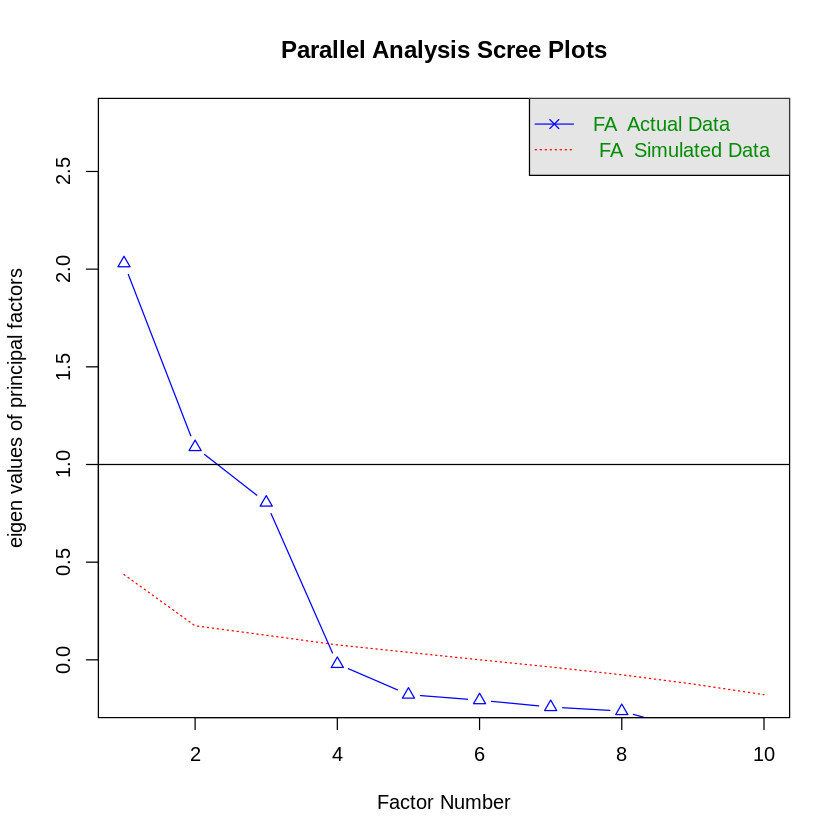

In [8]:
#Gráfico de sedimentación con la regla de Kaiser marcada:
scree(policorica)
#Análisis paralelo:
fa.parallel(policorica, n.obs=500, fa="fa", fm="uls")
#El Análisis Paralelo sugiere la extracción de tres factores, la regla de Kaiser, de 2, y el gráfico de sedimentación podríamos decir que de 3
#Haremos caso al Análisis Paralelo, por ser la técnica más recomendada actualmente

### Extracción de factores:
Vamos a extraer tres factores, siguiendo lo recomendado por el Análisis Paralelo.

Asimismo, debemos decidir si vamos a rotar los factores (cuestión que se recomienda) y qué tipo de rotación vamos a emplear. Dos tipos:
* Rotación oblicua: permite que los factores puedan tener correlación entre ellos. Tipo recomendado, ya que es el más cercano a la estructura real que deseamos explorar. Un ejemplo es el método *oblimin*.
* Rotación ortogonal: fuerza a los factores a que no puedan tener correlación entre ellos. Un ejemplo es el método *varimax*.

Cuanto mayor sea el peso factorial de un ítem en un factor mejor. Se aceptan pesos factoriales por encima de 0,4.

Factor Analysis using method =  uls
Call: fa(r = policorica, nfactors = 3, n.obs = nrow(datos_AFE), rotate = "oblimin", 
    fm = "uls", alpha = 0.05)
Standardized loadings (pattern matrix) based upon correlation matrix
            ULS1  ULS2  ULS3   h2   u2 com
ST181Q02HA -0.01 -0.06  0.72 0.50 0.50   1
ST181Q03HA -0.02  0.07  0.68 0.47 0.53   1
ST181Q04HA  0.02  0.00  0.79 0.64 0.36   1
ST182Q03HA  0.60  0.02  0.02 0.37 0.63   1
ST182Q04HA  0.67 -0.03 -0.02 0.44 0.56   1
ST182Q05HA  0.71  0.05  0.01 0.52 0.48   1
ST182Q06HA  0.58 -0.06 -0.01 0.33 0.67   1
ST183Q01HA  0.01  0.57  0.06 0.33 0.67   1
ST183Q02HA  0.02  0.90  0.00 0.81 0.19   1
ST183Q03HA -0.04  0.69 -0.03 0.47 0.53   1

                      ULS1 ULS2 ULS3
SS loadings           1.65 1.62 1.61
Proportion Var        0.17 0.16 0.16
Cumulative Var        0.17 0.33 0.49
Proportion Explained  0.34 0.33 0.33
Cumulative Proportion 0.34 0.67 1.00

 With factor correlations of 
     ULS1 ULS2 ULS3
ULS1 1.00 0.05 0.34
ULS2 0.05 1.0

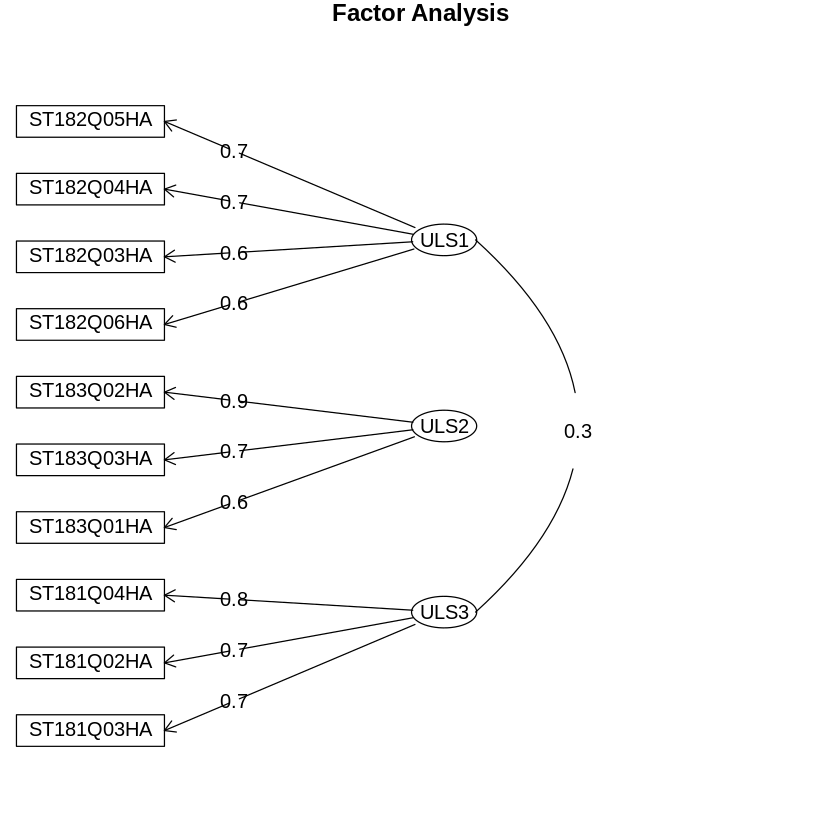

In [9]:
#Con rotación oblicua oblimin:
AFE_oblimin <- fa(policorica, nfactors=3, n.obs=nrow(datos_AFE), rotate="oblimin", fm="uls", alpha=0.05)
AFE_oblimin
fa.diagram(AFE_oblimin)
#Vemos que los items que más pesan en el factor 1 son los correspondientes a la variable Perseverancia - los que comienzan por ST182.
#Los items que más pesan en el factor 2 son los correspondientes a la variable Miedo al fracaso - los que comienzan por ST183.
#Los ítems que más pesan en el factor 3 son los correspondientes a la variable Competitividad - los que comienzan por ST181.
#Los índices de bondad del ajuste son muy buenos: RMSEA y RMSR inferiores a 0,08 y TLI mayor a 0,95
#En el gráfico vemos que los factores 1 y 3 (perseverancia y competitividad) están ligeramente correlacionados

Factor Analysis using method =  uls
Call: fa(r = policorica, nfactors = 3, n.obs = nrow(datos_AFE), rotate = "varimax", 
    fm = "uls", alpha = 0.05)
Standardized loadings (pattern matrix) based upon correlation matrix
            ULS1  ULS2 ULS3   h2   u2 com
ST181Q02HA  0.12 -0.01 0.70 0.50 0.50 1.1
ST181Q03HA  0.11  0.12 0.66 0.47 0.53 1.1
ST181Q04HA  0.17  0.05 0.78 0.64 0.36 1.1
ST182Q03HA  0.60  0.04 0.12 0.37 0.63 1.1
ST182Q04HA  0.66 -0.02 0.09 0.44 0.56 1.0
ST182Q05HA  0.70  0.06 0.13 0.52 0.48 1.1
ST182Q06HA  0.57 -0.04 0.08 0.33 0.67 1.1
ST183Q01HA  0.03  0.57 0.09 0.33 0.67 1.1
ST183Q02HA  0.03  0.90 0.04 0.81 0.19 1.0
ST183Q03HA -0.04  0.68 0.00 0.47 0.53 1.0

                      ULS1 ULS2 ULS3
SS loadings           1.66 1.62 1.59
Proportion Var        0.17 0.16 0.16
Cumulative Var        0.17 0.33 0.49
Proportion Explained  0.34 0.33 0.33
Cumulative Proportion 0.34 0.67 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 factors are sufficient.

The degrees

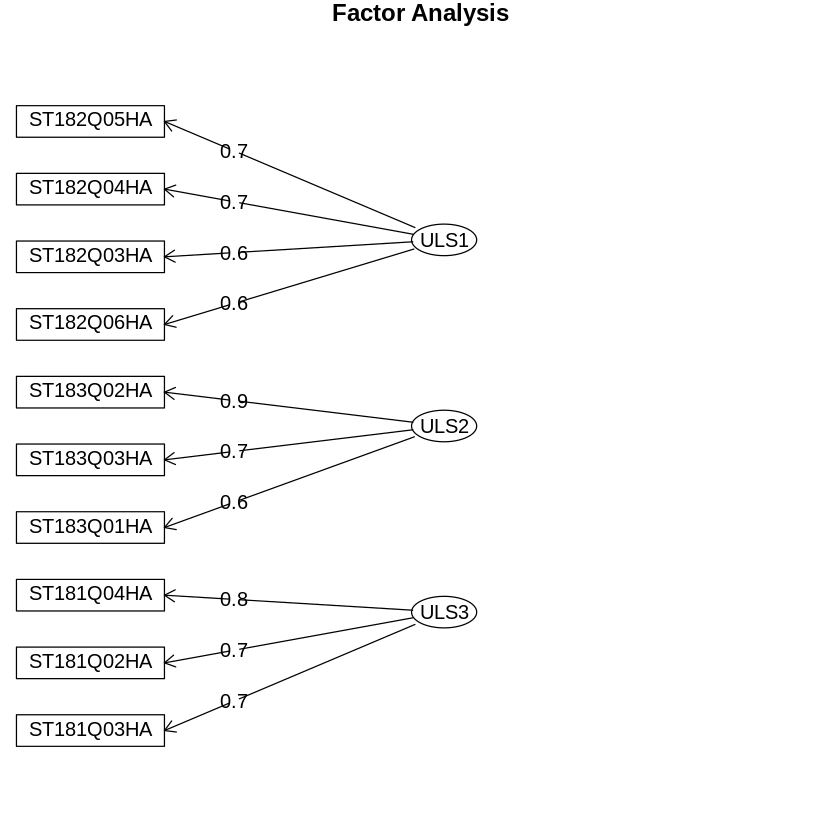

In [10]:
AFE_varimax <- fa(policorica, nfactors=3, n.obs=nrow(datos_AFE), rotate="varimax", fm="uls", alpha=0.05)
AFE_varimax
fa.diagram(AFE_varimax)
#Vemos que los items que más pesan en el factor 1 son los correspondientes a la variable Perseverancia - los que comienzan por ST182.
#Los items que más pesan en el factor 2 son los correspondientes a la variable Miedo al fracaso - los que comienzan por ST183.
#Los ítems que más pesan en el factor 3 son los correspondientes a la variable Competitividad - los que comienzan por ST181.
#Los índices de bondad del ajuste son muy buenos: RMSEA y RMSR inferiores a 0,08 y TLI mayor a 0,95
#En el gráfico vemos que los factores 1 y 3 ya no están correlacionados

### Resultados AFE:
La estructura factorial obtenida concuerda con la estructura factorial teórica de tres factores

## Análisis Factorial Confirmatorio (AFC):

### Pruebas de normalidad de los datos:

Call: mardia(x = datos_AFC, na.rm = TRUE)

Mardia tests of multivariate skew and kurtosis
Use describe(x) the to get univariate tests
n.obs = 16255   num.vars =  10 
b1p =  3.68   skew =  9980.25  with probability  <=  0
 small sample skew =  9982.43  with probability <=  0
b2p =  140.86   kurtosis =  85.84  with probability <=  0

Warning message in ks.test(datos_AFC, pnorm):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  datos_AFC
D = 0.88958, p-value < 2.2e-16
alternative hypothesis: two-sided


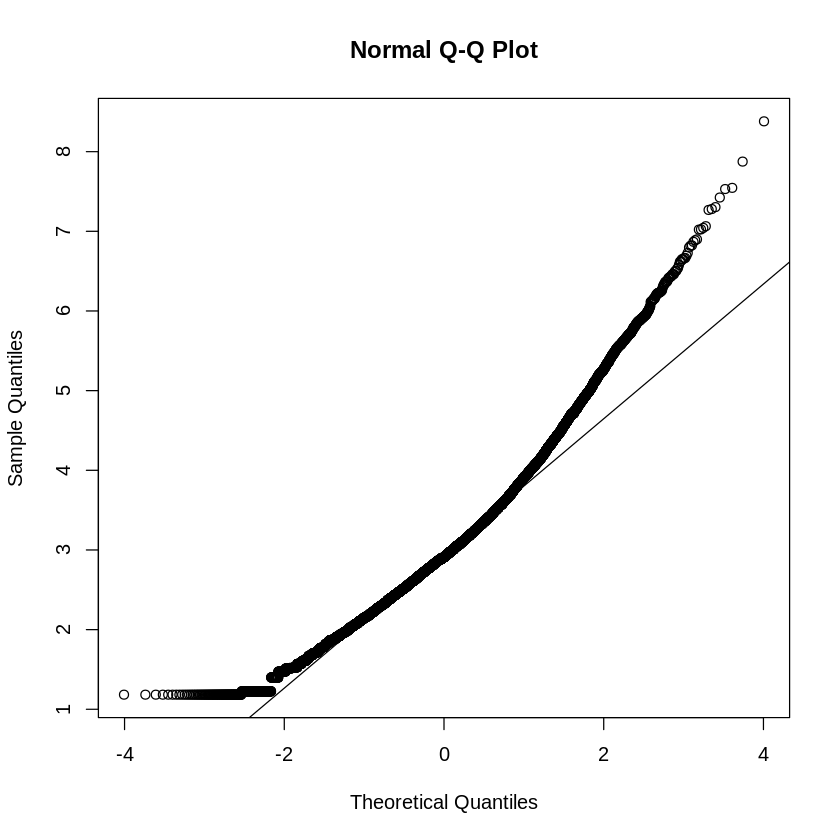

In [13]:
mardia(datos_AFC, na.rm = TRUE)
ks.test(datos_AFC, pnorm)
#Como los p-valores son inferiores a los niveles de significación habituales (10%, 5% y 1%) se rechaza la hipótesis nula, es decir, se rechaza la normalidad de los datos
#También podemos comprobar este hecho haciendo uso del Q-Q plot, ya que la línea de puntos está bastante alejada de la recta que es refleja la normal
#Como no existe normalidad, debemos emplear un método de extracción de factores robusto la inexistencia de la misma: ULS (Unweigthed Least Squares: Mínimos Cuadrados No Ponderados)

### Modelo con tres factores:

In [18]:
#Especificamos el modelo: en este modelo se respetan los tres factores teóricos:
modelo3F <- 'Competitividad =~ ST181Q02HA + ST181Q03HA + ST181Q04HA
             Perseverancia =~ ST182Q03HA + ST182Q04HA + ST182Q05HA + ST182Q06HA
             Miedo_al_fracaso =~ ST183Q01HA + ST183Q02HA + ST183Q03HA'
#Realizamos el factorial:
factorial3F <- cfa(modelo3F, datos_AFC, estimator="ULS", ordered=TRUE, orthogonal=FALSE)
#Al usar la opción ordered=TRUE usamos la matriz policórica
#Al usar la opción orthogonal=FALSE estamos diciendo que puede haber correlación entre factores
summary(factorial3F, fit.measures=TRUE, standardized=TRUE)
#Nos despliega una gran cantidad de información, pero lo esencial es fijarse en los índices de bondad del ajuste:
#El ajuste es muy bueno: RMSEA y SRMR < 0,08, y TLI y CFI > 0.95

lavaan 0.6-9 ended normally after 30 iterations

  Estimator                                        ULS
  Optimization method                           NLMINB
  Number of model parameters                        43
                                                      
                                                  Used       Total
  Number of observations                         16255       17971
                                                                  
Model Test User Model:
                                                      
  Test statistic                              1347.860
  Degrees of freedom                                32
  P-value (Unknown)                                 NA

Model Test Baseline Model:

  Test statistic                             69227.035
  Degrees of freedom                                45
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.981
  

### Modelo con dos factores:

In [19]:
#Especificamos el modelo: en este modelo Competitividad y Perseverancia los introducimos en el mismo factor, ya que con el AFE vimos que tenían correlación:
modelo2F <- 'Competitividad_Perseverancia =~ ST181Q02HA + ST181Q03HA + ST181Q04HA + ST182Q03HA + ST182Q04HA + ST182Q05HA + ST182Q06HA
             Miedo_al_fracaso =~ ST183Q01HA + ST183Q02HA + ST183Q03HA'
#Realizamos el factorial:
factorial2F <- cfa(modelo2F, datos_AFC, estimator="ULS", ordered=TRUE, orthogonal=FALSE)
summary(factorial2F, fit.measures=TRUE, standardized=TRUE)
#El ajuste no es bueno: RMSEA y SRMR > 0,08, y TLI y CFI < 0.95

lavaan 0.6-9 ended normally after 29 iterations

  Estimator                                        ULS
  Optimization method                           NLMINB
  Number of model parameters                        41
                                                      
                                                  Used       Total
  Number of observations                         16255       17971
                                                                  
Model Test User Model:
                                                       
  Test statistic                              11937.402
  Degrees of freedom                                 34
  P-value (Unknown)                                  NA

Model Test Baseline Model:

  Test statistic                             69227.035
  Degrees of freedom                                45
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.82

### Modelo con un factor:

In [22]:
#Especificamos el modelo: todos los items en un único factor:
modelo1F <- 'Factor =~ ST181Q02HA + ST181Q03HA + ST181Q04HA + ST182Q03HA + ST182Q04HA + ST182Q05HA + ST182Q06HA + ST183Q01HA + ST183Q02HA + ST183Q03HA'
#Realizamos el factorial:
factorial1F <- cfa(modelo1F, datos_AFC, estimator="ULS", ordered=TRUE, orthogonal=FALSE)
summary(factorial1F, fit.measures=TRUE, standardized=TRUE)
#Nos despliega una gran cantidad de información, pero lo esencial es fijarse en los índices de bondad del ajuste:
#El ajuste no es bueno: RMSEA y SRMR > 0,08, y TLI y CFI < 0.95 (de hecho, es peor que en el modelo con dos factores)

lavaan 0.6-9 ended normally after 24 iterations

  Estimator                                        ULS
  Optimization method                           NLMINB
  Number of model parameters                        40
                                                      
                                                  Used       Total
  Number of observations                         16255       17971
                                                                  
Model Test User Model:
                                                       
  Test statistic                              28114.458
  Degrees of freedom                                 35
  P-value (Unknown)                                  NA

Model Test Baseline Model:

  Test statistic                             69227.035
  Degrees of freedom                                45
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.59

### Resultados AFC:
Los índices de bondad del ajuste muestran que el modelo que respecta la estructura de los tres factores teóricos es el que mejor ajusta ajusta. Su ajuste a los datos es muy bueno.

## Fiabilidad:
Para estimar la fiabilidad del instrumento de medida compuesto por los diez ítems analizados en el Análisis Factorial doble, vamos a estimar los índices alfa y omega. Utilizamos para ello toda la muestra.

Aunque el índice alfa de Cronbach es el más utilizado para mostrar la fiabilidad de un test, se recomienda utilizar en su lugar el omega de McDonald, que no requiere del cumplimiento de los principios de tau-equivalencia y no correlación entre errores.


In [30]:
#Los items relevantes con todas las observaciones los teníamos en el objeto "subconjunto"
subconjunto$CNTSTUID <- NULL
#Eliminamos las observaciones con valores perdidos:
Datos_fiabilidad <- na.omit(subconjunto)
#División del dataset en tres: uno por cada variable
Datos_fiabilidad_Competitividad <- Datos_fiabilidad[ ,1:3]
Datos_fiabilidad_Perseverancia <- Datos_fiabilidad[ ,4:7]
Datos_fiabilidad_Miedo_al_fracaso <- Datos_fiabilidad[ ,8:10]


Test of tau-equavilence
The robust F statistic is  404.2 
with a p-value  0 
**The F test rejected tau-equavilence**

The alpha is 0.6771024.
About 17.07% of cases were downweighted.
The alpha is 0.6821946.
The alpha is 0.6835019.
About 4.96% of cases were downweighted.
The alpha is 0.6817043.
About 7.18% of cases were downweighted.
The alpha is 0.680223.
About 8.81% of cases were downweighted.
The alpha is 0.6792195.
About 10.17% of cases were downweighted.
The alpha is 0.6785102.
About 11.35% of cases were downweighted.
The alpha is 0.6779836.
About 12.66% of cases were downweighted.
The alpha is 0.6776223.
About 13.87% of cases were downweighted.
The alpha is 0.6773665.
About 14.94% of cases were downweighted.
The alpha is 0.6771982.
About 16% of cases were downweighted.
The alpha is 0.6771024.
About 17.07% of cases were downweighted.


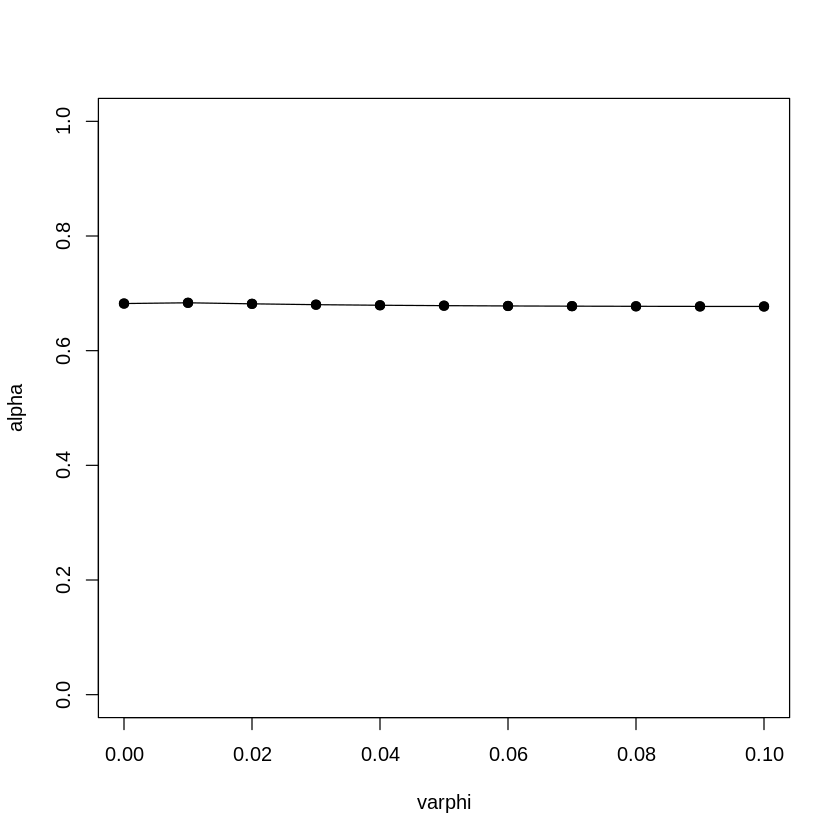

In [32]:
#Estimamos el índice alfa para todo el instrumento de medida y por cada grupo de ítems (por cada variable a medir):
alfa.est <- alpha(Datos_fiabilidad, varphi = 0.1)
plot(alfa.est, type="d") #Usamos un varphi de 0.1, que es lo recomendado cuando no vemos cambios al variar esta variable

In [36]:
alfa.total <- alpha(Datos_fiabilidad, varphi = 0.1, se= FALSE, test=TRUE, complete=TRUE)
print("---------------------------")
alfa.Competitividad <- alpha(Datos_fiabilidad_Competitividad, varphi = 0.1, se= FALSE, test=TRUE, complete=TRUE)
print("---------------------------")
alfa.Perseverancia <- alpha(Datos_fiabilidad_Perseverancia, varphi = 0.1, se= FALSE, test=TRUE, complete=TRUE)
print("---------------------------")
alfa.Miedo_al_fracaso <- alpha(Datos_fiabilidad_Miedo_al_fracaso, varphi = 0.1, se= FALSE, test=TRUE, complete=TRUE)

Test of tau-equavilence
The robust F statistic is  404.2 
with a p-value  0 
**The F test rejected tau-equavilence**

The alpha is 0.6771024.
About 17.07% of cases were downweighted.
[1] "---------------------------"
Test of tau-equavilence
The robust F statistic is  102.443 
with a p-value  0 
**The F test rejected tau-equavilence**

The alpha is 0.7955077.
About 12.37% of cases were downweighted.
[1] "---------------------------"
Test of tau-equavilence
The robust F statistic is  187.211 
with a p-value  0 
**The F test rejected tau-equavilence**

The alpha is 0.7209826.
About 12.18% of cases were downweighted.
[1] "---------------------------"
Test of tau-equavilence
The robust F statistic is  736.017 
with a p-value  0 
**The F test rejected tau-equavilence**

The alpha is 0.7868686.
About 11.08% of cases were downweighted.


Test of homogeneity
The robust F statistic is  515.272 
with a p-value  0 

**The F test rejected homogeneity**

The omega is 0.6168285.
About 17.07% of cases were downweighted.
The omega is 0.6318791.
The omega is 0.6309317.
About 4.96% of cases were downweighted.
The omega is 0.6270825.
About 7.18% of cases were downweighted.
The omega is 0.6240599.
About 8.81% of cases were downweighted.
The omega is 0.6219514.
About 10.17% of cases were downweighted.
The omega is 0.6203973.
About 11.35% of cases were downweighted.
The omega is 0.6192006.
About 12.66% of cases were downweighted.
The omega is 0.6183262.
About 13.87% of cases were downweighted.
The omega is 0.6176676.
About 14.94% of cases were downweighted.
The omega is 0.6171865.
About 16% of cases were downweighted.
The omega is 0.6168285.
About 17.07% of cases were downweighted.


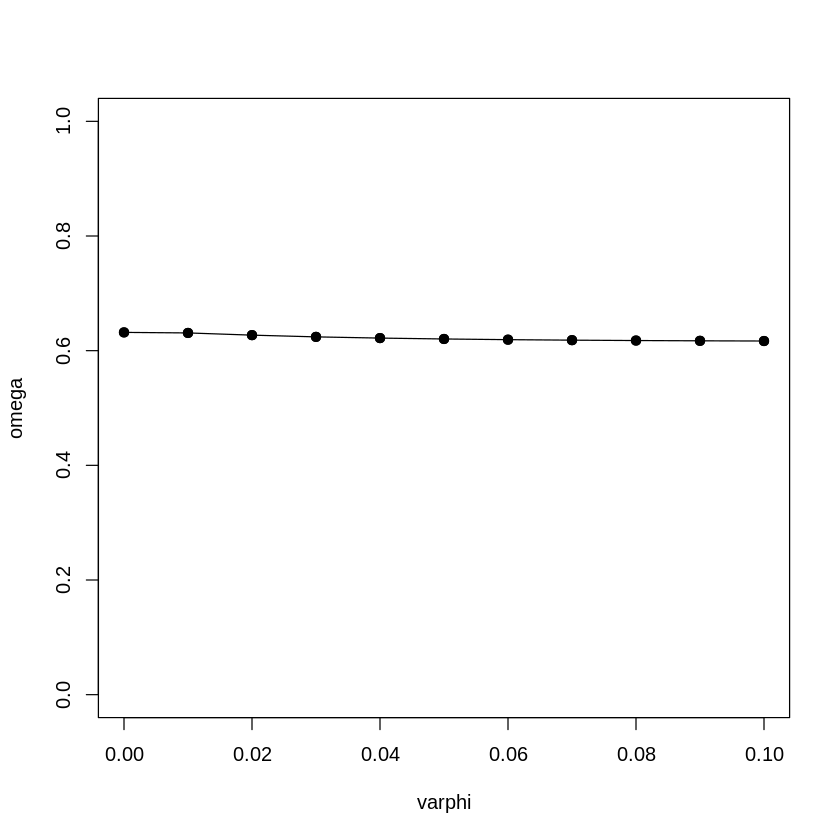

In [35]:
#Estimamos el índice omega para todo el instrumento de medida y por cada grupo de ítems (por cada variable a medir):
omega.est <- omega(Datos_fiabilidad, varphi = 0.1)
plot(omega.est, type="d") #Usamos un varphi de 0.1, que es lo recomendado cuando no vemos cambios al variar esta variable

In [37]:
omega.total <- omega(Datos_fiabilidad, varphi = 0.1, se= FALSE, test=TRUE, complete=TRUE)
print("---------------------------")
omega.Competitividad <- omega(Datos_fiabilidad_Competitividad, varphi = 0.1, se= FALSE, test=FALSE, complete=TRUE)
print("---------------------------")
omega.Perseverancia <- omega(Datos_fiabilidad_Perseverancia, varphi = 0.1, se= FALSE, test=FALSE, complete=TRUE)
print("---------------------------")
omega.Miedo_al_fracaso <- omega(Datos_fiabilidad_Miedo_al_fracaso, varphi = 0.1, se= FALSE, test=FALSE, complete=TRUE)

Test of homogeneity
The robust F statistic is  515.272 
with a p-value  0 

**The F test rejected homogeneity**

The omega is 0.6168285.
About 17.07% of cases were downweighted.
[1] "---------------------------"
The omega is 0.7968867.
About 12.37% of cases were downweighted.
[1] "---------------------------"
The omega is 0.7223053.
About 12.18% of cases were downweighted.
[1] "---------------------------"
The omega is 0.7972914.
About 11.08% of cases were downweighted.


Los valores, tanto para el índice alfa como para el omega, son mayores a 0,6 para la escala entera y mayores a 0,7 para cada una de sus escalas. Estos valores distan de ser óptimos, sin embargo, dado el gran tamaño de la muestra, y al no estar en ningún caso por debajo de 0,5, podríamos decir que la fiabilidad de la escala es aceptable.

## Resultados finales:
Los valores estimados para los índices alfa y omega mostraron que la fiabilidad es aceptable. Asimismo, los resultados de los análisis factoriales - exploratorio y confirmatorio - están en sintonía, indicando que el modelo con los tres factores teóricos es el que mejor ajusta. Por todo ello, podemos considerar que, en el caso español, dichas tres variables (Competitividad, Perseverancia y Miedo al fracaso) son medidas de manera eficaz mediante esos diez ítems. También podemos decir que las tres subescalas (los tres conjuntos de ítems) miden variables distinguibles. El instrumento de medida es fiable y válido.